<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Clases/Clase8/01_Clase7_2_clasificacion_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 9: Modelos de clasificación en R


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com

## Árboles de decisión

Para la implementación de árboles de decisión (CART - classification and regression trees), utilizaremos el package `rpart` y el packages `visNetwork` (en Rstudio) para su visulaización. Otro package para visualizar árboles `rpart.plot`

## Titanic (Continuación)
Una vex realizado el paso de exploración, trataremos de predecir si una persona sobrevivirá al hundimiento del titanic utilizando árboles de clasificación.

In [ ]:
#install.packages("rpart.plot")
#install.packages("visNetwork")


In [8]:
library(rpart) # permite generar árboles de clasificación
library(tidyverse)
library(rpart.plot)#para visualizar un árbol un poco mejor
#library(visNetwork)


In [9]:


data2 <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R/master/Clases/Clase7/titanic_v2.csv")
data2
glimpse(data2)



data2$Survived <- as.factor(data2$Survived)

summary(data2$Survived)


PassengerId,Survived,Pclass,apellido,titulo,nombre,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_familia,tipo_familia,menor,madre
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,0,3,Braund,Mr,Owen Harris,male,22,1,0,A/5 21171,7.2500,,S,2,pequena,adulto,no_madre
2,1,1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),female,38,1,0,PC 17599,71.2833,C85,C,2,pequena,adulto,no_madre
3,1,3,Heikkinen,Miss,Laina,female,26,0,0,STON/O2. 3101282,7.9250,,S,1,solo,adulto,no_madre
4,1,1,Futrelle,Mrs,Jacques Heath (Lily May Peel),female,35,1,0,113803,53.1000,C123,S,2,pequena,adulto,no_madre
5,0,3,Allen,Mr,William Henry,male,35,0,0,373450,8.0500,,S,1,solo,adulto,no_madre
6,0,3,Moran,Mr,James,male,47,0,0,330877,8.4583,,Q,1,solo,adulto,no_madre
7,0,1,McCarthy,Mr,Timothy J,male,54,0,0,17463,51.8625,E46,S,1,solo,adulto,no_madre
8,0,3,Palsson,Master,Gosta Leonard,male,2,3,1,349909,21.0750,,S,5,grande,menor,no_madre
9,1,3,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg),female,27,0,2,347742,11.1333,,S,3,pequena,adulto,madre


Rows: 891
Columns: 18
$ PassengerId  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ Survived     <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,…
$ Pclass       <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3,…
$ apellido     <chr> "Braund", "Cumings", "Heikkinen", "Futrelle", "Allen", "…
$ titulo       <chr> "Mr", "Mrs", "Miss", "Mrs", "Mr", "Mr", "Mr", "Master", …
$ nombre       <chr> " Owen Harris", " John Bradley (Florence Briggs Thayer)"…
$ Sex          <chr> "male", "female", "female", "female", "male", "male", "m…
$ Age          <dbl> 22, 38, 26, 35, 35, 47, 54, 2, 27, 14, 4, 58, 20, 39, 14…
$ SibSp        <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1,…
$ Parch        <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0,…
$ Ticket       <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "…
$ Fare         <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.862…
$ Cabin        <chr> "", "C85"

0   1 
549 342

In [10]:

#Dividimos en train y test
set.seed(112)

test <- sample_frac(data2, 0.3)
train <- anti_join(data2,test)

# guardamos en disco estos datasets para otros modelos y evaluaciones

save(test,train,file= "train_test.RData")
# load("train_test.RData")





Joining, by = c("PassengerId", "Survived", "Pclass", "apellido", "titulo", "nombre", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "n_familia", "tipo_familia", "menor", "madre")



In [11]:
# Árbol de decisión -------------------------------------------------------
# Consideramos los parámetros por defecto
mod_arbol <- rpart(Survived ~ Pclass +
                               Sex +
                               Age +
                               SibSp +
                               Parch + 
                               Fare +
                               Embarked +
                               titulo + 
                               tipo_familia +
                               menor + 
                               madre,
          data = train
      )




In [12]:
str(mod_arbol)

List of 15
 $ frame              :'data.frame':	9 obs. of  9 variables:
  ..$ var       : chr [1:9] "titulo" "<leaf>" "Pclass" "Fare" ...
  ..$ n         : int [1:9] 624 376 248 116 35 81 11 70 132
  ..$ wt        : num [1:9] 624 376 248 116 35 81 11 70 132
  ..$ dev       : num [1:9] 240 62 70 54 4 31 3 23 8
  ..$ yval      : num [1:9] 1 1 2 1 1 2 1 2 2
  ..$ complexity: num [1:9] 0.45 0.00694 0.05625 0.05625 0 ...
  ..$ ncompete  : int [1:9] 4 0 4 4 0 4 0 0 0
  ..$ nsurrogate: int [1:9] 5 0 5 5 0 0 0 0 0
  ..$ yval2     : num [1:9, 1:6] 1 1 2 1 1 2 1 2 2 384 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:6] "" "" "" "" ...
 $ where              : Named int [1:624] 2 9 9 2 2 2 5 8 8 2 ...
  ..- attr(*, "names")= chr [1:624] "1" "2" "3" "4" ...
 $ call               : language rpart(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare +      Embarked + titulo + tipo_familia + me| __truncated__
 $ terms              :Classes 'terms', 'formul

In [14]:


mod_arbol$frame
#mod_arbol$where #el nodo al cual llegó cada observación de train
mod_arbol$variable.importance # a mayor valor , más importante
#mod_arbol$cptable # contiene la complejidad del arbol según cantidad de nodos finales (nos va ayudar a evitar sobreajuste)




,var,n,wt,dev,yval,complexity,ncompete,nsurrogate,yval2
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,6]>"
1,titulo,624,624,240,1,0.450000000,4,5,"1, 384, 240, 0.61538462, 0.3846154, 1.00000000"
2,<leaf>,376,376,62,1,0.006944444,0,0,"1, 314, 62, 0.83510638, 0.1648936, 0.60256410"
3,Pclass,248,248,70,2,0.056250000,4,5,"2, 70, 178, 0.28225806, 0.7177419, 0.39743590"
6,Fare,116,116,54,1,0.056250000,4,5,"1, 62, 54, 0.53448276, 0.4655172, 0.18589744"
12,<leaf>,35,35,4,1,0.000000000,0,0,"1, 31, 4, 0.88571429, 0.1142857, 0.05608974"
13,Age,81,81,31,2,0.020833333,4,0,"2, 31, 50, 0.38271605, 0.6172840, 0.12980769"
26,<leaf>,11,11,3,1,0.010000000,0,0,"1, 8, 3, 0.72727273, 0.2727273, 0.01762821"
27,<leaf>,70,70,23,2,0.009722222,0,0,"2, 23, 47, 0.32857143, 0.6714286, 0.11217949"
7,<leaf>,132,132,8,2,0.000000000,0,0,"2, 8, 124, 0.06060606, 0.9393939, 0.21153846"


titulo          Sex tipo_familia          Age        Parch       Pclass 
    91.34755     82.77081     44.91871     35.82272     29.67030     27.72943 
       menor         Fare        SibSp 
    26.82255     25.51439     13.03246

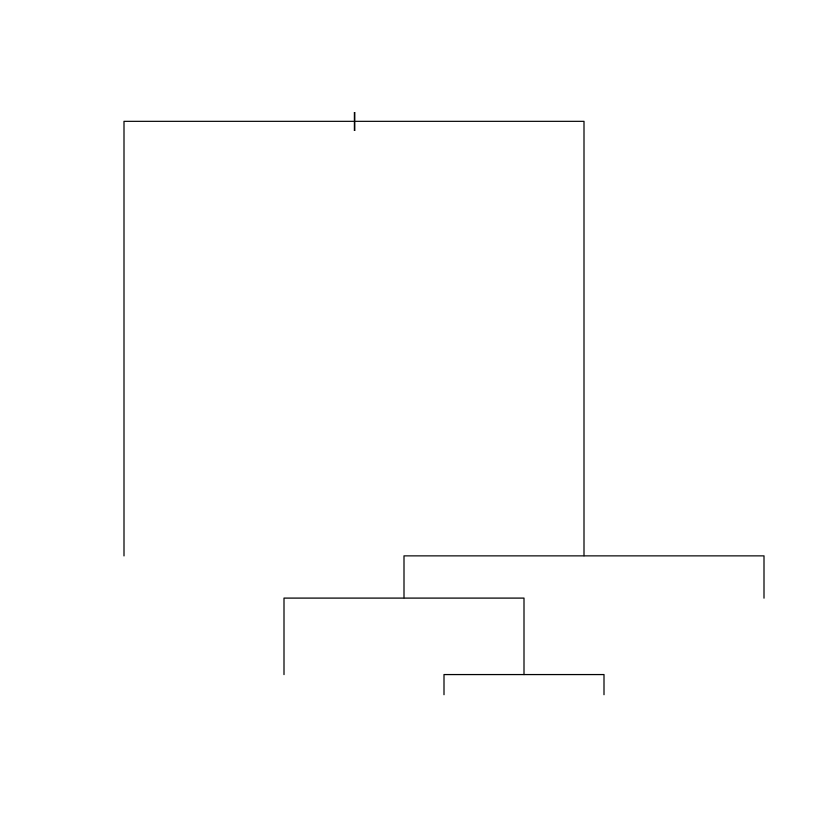

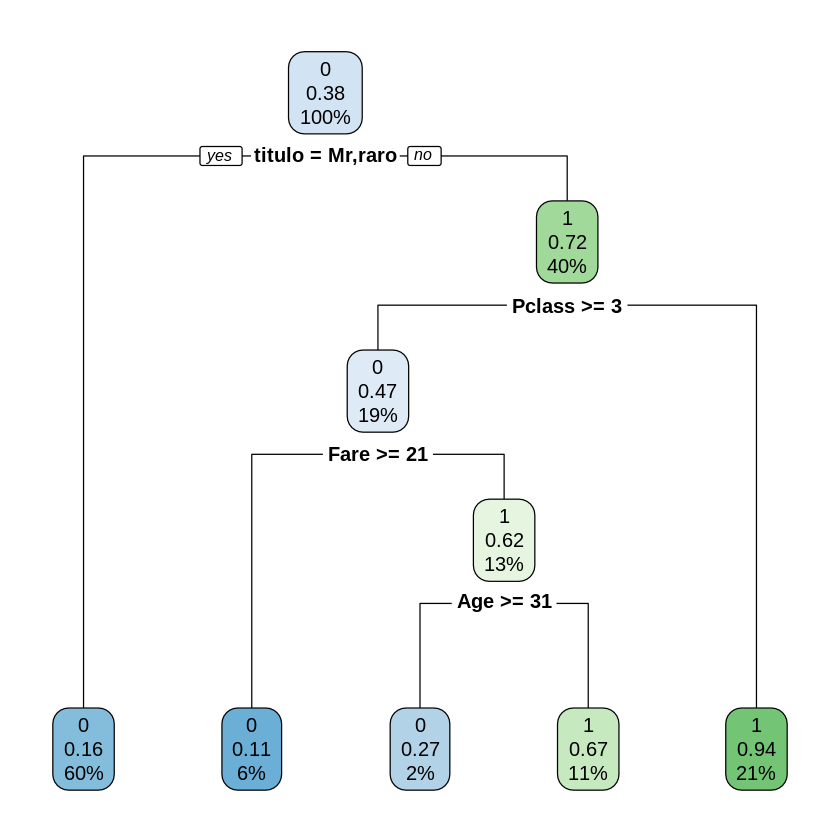

In [16]:

# Visualización arbol -----------------------------------------------------
plot(mod_arbol)
rpart.plot(mod_arbol)





In [ ]:
# predicciones ------------------------------------------------------------

predicciones <- predict(mod_arbol,test)

predicciones

In [20]:
prob_pred <- predicciones[,2]
predicciones <- predicciones[,2] > 0.8
predicciones

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
 TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
 TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
 TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
 TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
 TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  261   262   263   264   265   266   267 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

In [22]:
# Matriz de confusión
mc <- table(clase_real = test$Survived, clase_predicha = predicciones)

mc

          clase_predicha
clase_real FALSE TRUE
         0   164    1
         1    56   46

In [26]:
# Accuracy (a cuantos le "achuntó" el modelo, independiente de la categoría de interés)
(mc[1,1] + mc[2,2]) / sum(mc)

#79% de accuracy.
#21% de tasa de error.
#recall
(mc[2,2])/(mc[2,1]+mc[2,2])
#precision
(mc[2,2])/(mc[1,2]+mc[2,2])

[1] 0.7865169

[1] 0.4509804

[1] 0.9787234

In [ ]:
# utilizando visNetwork (puede requerir dependencia del package sparkline)

#visTree(mod_arbol) # En entornno de notebooks no funciona, si en Rstidio

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


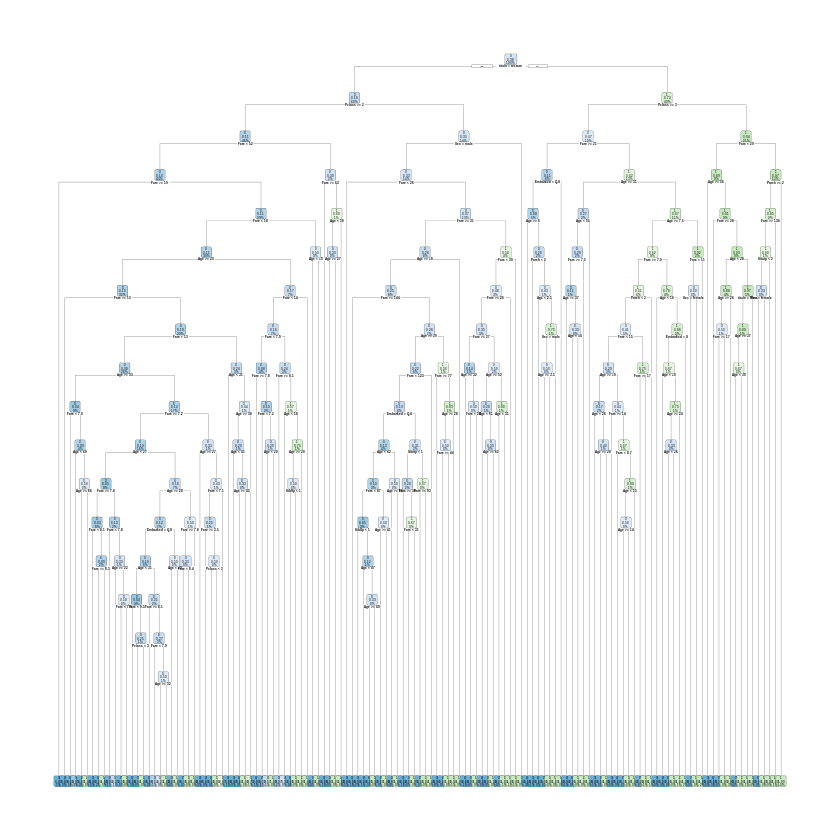


Classification tree:
rpart(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked + titulo + tipo_familia + menor + madre, 
    data = train, control = rpart.control(cp = 1e-06, minsplit = 2))

Variables actually used in tree construction:
[1] Age      Embarked Fare     Parch    Pclass   Sex      SibSp    titulo  

Root node error: 240/624 = 0.38462

n= 624 

          CP nsplit rel error  xerror     xstd
1  0.4500000      0  1.000000 1.00000 0.050637
2  0.0562500      1  0.550000 0.55000 0.042508
3  0.0208333      3  0.437500 0.46250 0.039803
4  0.0069444      4  0.416667 0.47500 0.040219
5  0.0062500      9  0.370833 0.47083 0.040082
6  0.0052083     17  0.312500 0.47500 0.040219
7  0.0041667     21  0.291667 0.47500 0.040219
8  0.0033333     32  0.245833 0.47917 0.040356
9  0.0031250     37  0.229167 0.50000 0.041021
10 0.0027778     45  0.204167 0.52083 0.041658
11 0.0020833     54  0.179167 0.52083 0.041658
12 0.0018519     76  0.133333 0.54583 0.042389
13

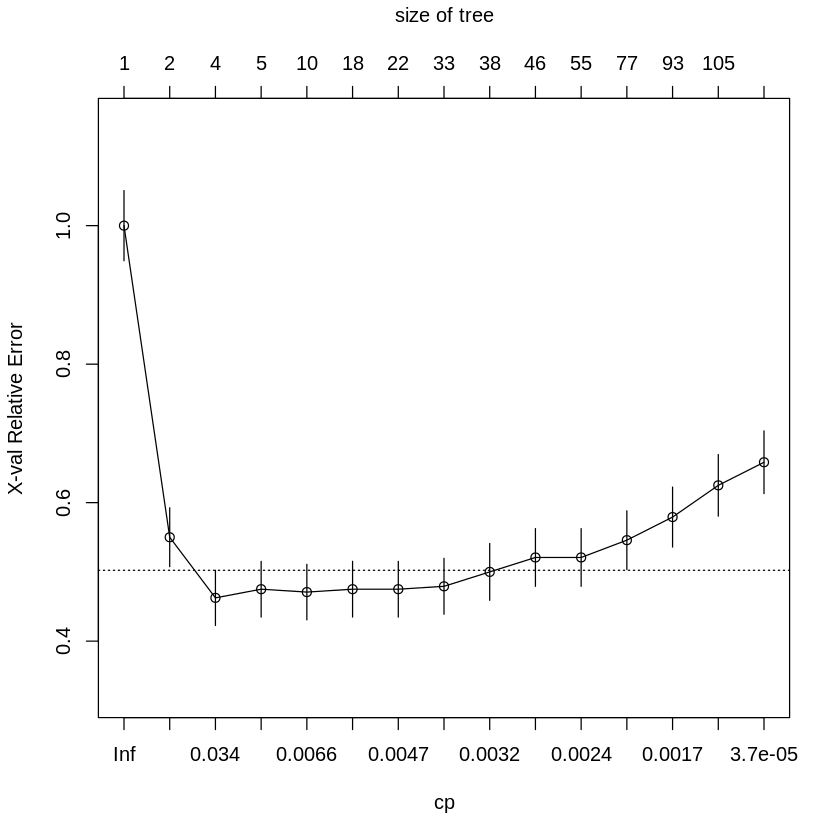

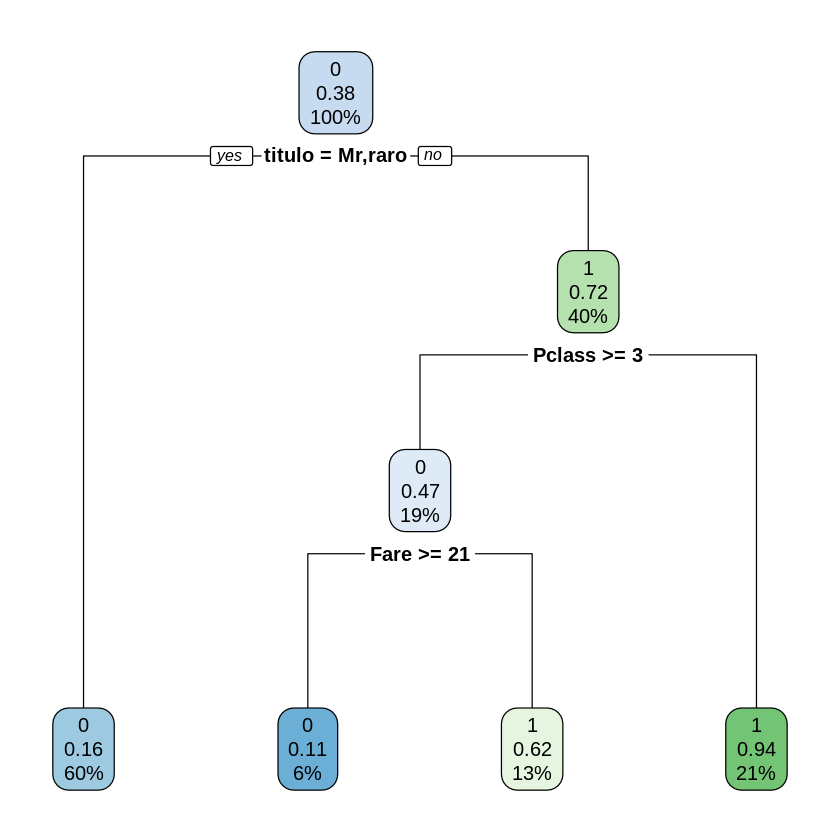

In [33]:

# Poda --------------------------------------------------------------------

mod_arbol_2 <- rpart(Survived ~ Pclass +
                     Sex +
                     Age +
                     SibSp +
                     Parch + 
                     Fare +
                     Embarked +
                     titulo + 
                     tipo_familia +
                     menor + 
                     madre,
                   data = train,
                   control = rpart.control(cp = 0.000001,minsplit = 2)
)
#cp : parámetro de complejidad. 

rpart.plot(mod_arbol_2)


plotcp(mod_arbol_2)
printcp(mod_arbol_2)

arbol_pod <- prune(mod_arbol_2, cp = 0.034) #permite podar el arbol

rpart.plot(arbol_pod)
## Guardo test con predicciones de arbol podado y sobreajustado
save(test,file = "test_predicciones.RData")




In [34]:
# Evaluación como modelo predictivo ---------------------------------------

pred <- predict(arbol_pod,newdata = select(test,-Survived))
pred_or <- predict(mod_arbol_2,newdata = select(test,-Survived))

pred <- pred[,2]
pred_or <- pred_or[,2]

test$pred_arbol_pod <- pred
test$pred_arbol <- pred_or

## Asignamos categoría con un punto de corte en 0.5 
test$pred_arbol_pod_clase <- ifelse(pred > 0.5,1,0)
test$pred_arbol_clase <- ifelse(pred_or > 0.5,1,0)

mc_sobre <- table(select(test,pred_arbol_clase,Survived))
mc_pod <- table(select(test,pred_arbol_pod_clase,Survived))



In [35]:
# Podemos definir algunas métricas de evaluación
# Accuracy, recall, precision etc.. 


# Otros packages de interés
Para la implementación  de modelos deMachine Learning, desde su entrenamiento hasta validación, algunos paquetes que pueden ser de utilidad son los siguientes:

  * `caret`: http://topepo.github.io/caret/index.html
  * `h2o`: http://h2o-release.s3.amazonaws.com/h2o/master/1292/docs-website/tutorial/rtutorial.html

# Curvas de ROC

Si bien los packages mencionados anteriormente poseen sus propias implementaciones para la visualización de curvas de ROC, una alternativa es mediante el package `plotROC
`.

In [27]:
#install.packages("plotROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘gridSVG’, ‘shiny’, ‘plyr’




In [29]:
library(plotROC)
library(ggplot2)

In [30]:


# Analizamos ejemplo básico #
D.ex <- rbinom(50, 1, .5)
rocdata <- data.frame(D = c(D.ex, D.ex), 
                      M = as.numeric(c(rnorm(50, mean = D.ex, sd = .4), rnorm(50, mean = D.ex, sd = 1)) ) ,
                      Z = c(rep("A", 50), rep("B", 50)))

rocdata




D,M,Z
<int>,<dbl>,<chr>
0,-0.06290049,A
1,-0.41251415,A
0,-0.05082644,A
0,0.41019846,A
1,0.38359958,A
1,1.28254100,A
1,1.85605253,A
0,-0.51613221,A
1,1.78644625,A


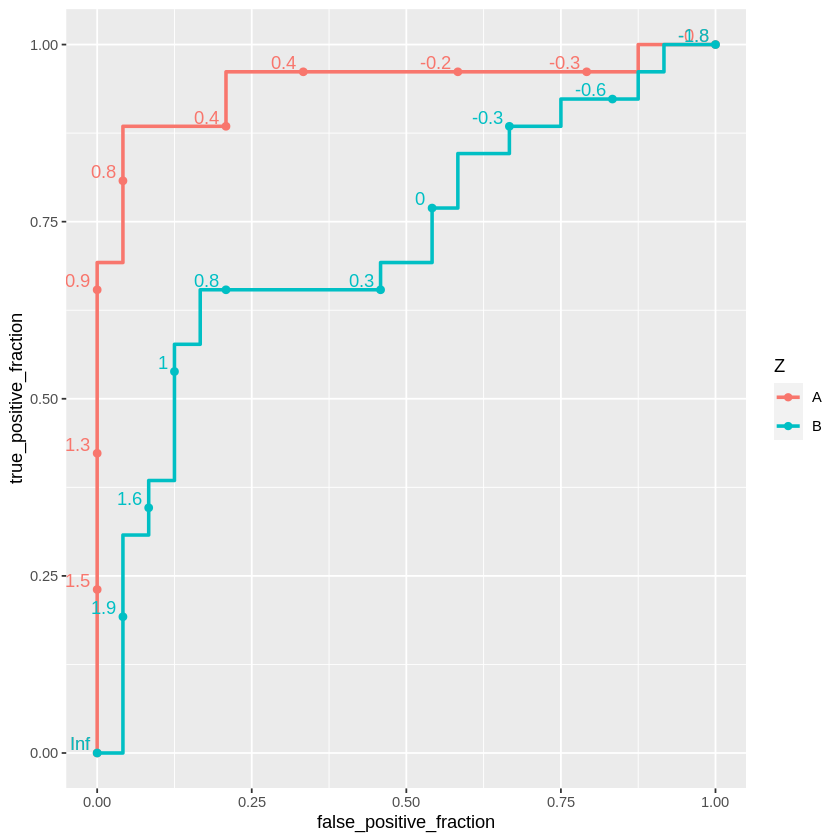

In [31]:
ggplot(rocdata, aes(m = M, d = D,color = Z)) + geom_roc()

In [36]:
head(test)

,PassengerId,Survived,Pclass,apellido,titulo,nombre,Sex,Age,SibSp,Parch,⋯,Cabin,Embarked,n_familia,tipo_familia,menor,madre,pred_arbol_pod,pred_arbol,pred_arbol_pod_clase,pred_arbol_clase
,<int>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,110,1,3,Moran,Miss,Bertha,female,4,1,0,⋯,,Q,2,pequena,menor,no_madre,0.1142857,0,0,0
2,10,1,2,Nasser,Mrs,Nicholas (Adele Achem),female,14,1,0,⋯,,C,2,pequena,menor,no_madre,0.9393939,1,1,1
3,492,0,3,Windelov,Mr,Einar,male,21,0,0,⋯,,S,1,solo,adulto,no_madre,0.1648936,0,0,0
4,557,1,1,Duff Gordon,raro,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48,1,0,⋯,A16,C,2,pequena,adulto,no_madre,0.1648936,1,0,1
5,126,1,3,Nicola-Yarred,Master,Elias,male,12,1,0,⋯,,C,2,pequena,menor,no_madre,0.6172840,1,1,1
6,873,0,1,Carlsson,Mr,Frans Olof,male,33,0,0,⋯,B51 B53 B55,S,1,solo,adulto,no_madre,0.1648936,0,0,0


In [37]:
head(test)
# Para tener la data en formato "long" podemos utilzar la función melt_roc (también podemos usar pivot_longer de tidyr)

pivot_test <- melt_roc(test, "Survived", c("pred_arbol_pod","pred_arbol"))


head(pivot_test)

,PassengerId,Survived,Pclass,apellido,titulo,nombre,Sex,Age,SibSp,Parch,⋯,Cabin,Embarked,n_familia,tipo_familia,menor,madre,pred_arbol_pod,pred_arbol,pred_arbol_pod_clase,pred_arbol_clase
,<int>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,110,1,3,Moran,Miss,Bertha,female,4,1,0,⋯,,Q,2,pequena,menor,no_madre,0.1142857,0,0,0
2,10,1,2,Nasser,Mrs,Nicholas (Adele Achem),female,14,1,0,⋯,,C,2,pequena,menor,no_madre,0.9393939,1,1,1
3,492,0,3,Windelov,Mr,Einar,male,21,0,0,⋯,,S,1,solo,adulto,no_madre,0.1648936,0,0,0
4,557,1,1,Duff Gordon,raro,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48,1,0,⋯,A16,C,2,pequena,adulto,no_madre,0.1648936,1,0,1
5,126,1,3,Nicola-Yarred,Master,Elias,male,12,1,0,⋯,,C,2,pequena,menor,no_madre,0.6172840,1,1,1
6,873,0,1,Carlsson,Mr,Frans Olof,male,33,0,0,⋯,B51 B53 B55,S,1,solo,adulto,no_madre,0.1648936,0,0,0


,D,M,name
,<fct>,<dbl>,<chr>
pred_arbol_pod1,1,0.1142857,pred_arbol_pod
pred_arbol_pod2,1,0.9393939,pred_arbol_pod
pred_arbol_pod3,0,0.1648936,pred_arbol_pod
pred_arbol_pod4,1,0.1648936,pred_arbol_pod
pred_arbol_pod5,1,0.6172840,pred_arbol_pod
pred_arbol_pod6,0,0.1648936,pred_arbol_pod


In [38]:
pivot_test <- pivot_test %>% 
              mutate(D = strtoi(D)) #strtoi permita transformar un string a entero
head(pivot_test)

,D,M,name
,<int>,<dbl>,<chr>
1,1,0.1142857,pred_arbol_pod
2,1,0.9393939,pred_arbol_pod
3,0,0.1648936,pred_arbol_pod
4,1,0.1648936,pred_arbol_pod
5,1,0.6172840,pred_arbol_pod
6,0,0.1648936,pred_arbol_pod


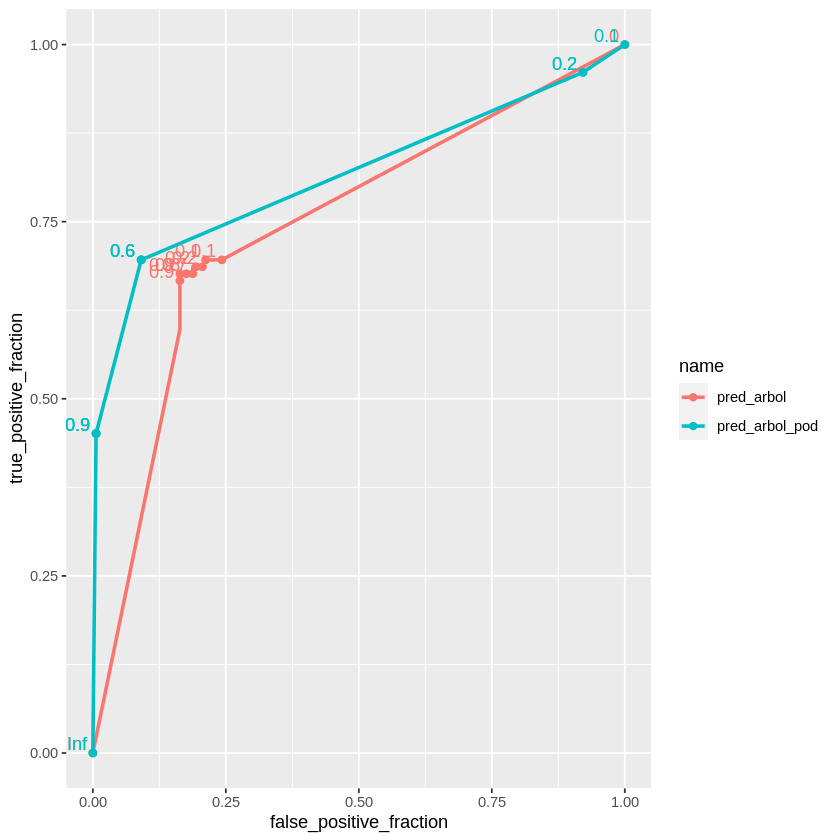

In [39]:
# En el caso del hundimiento de titanic -----------------------------------

g_roc <- pivot_test %>% 
  ggplot(aes(m = M, d = D, color = name)) + geom_roc()

g_roc




In [41]:
calc_auc(g_roc)

PANEL,group,AUC
<fct>,<int>,<dbl>
1,1,0.7456031
1,2,0.8151218
